# matplotlib 폰트 변경하기 

#### by frhyme, 180314

### intro. 

- 물론 matplotlib을 활용해서 그림을 그릴 때 legend, label을 성의 없이 할 때가 많긴 합니다. 대략적인 추이만 볼 때가 많으니까요. 
- 하지만, 분석한 결과를 그림으로 저장해서 바로 리포트에 담는다거나 할 경우에는 font를 손보는게 필요합니다. 
    - matplotlib의 기본 폰트의 경우 한글이 담겨 있지 않기 때문에, 한글을 넣으면 깨지는 것도 문제고요. 
- 그래서, 이번에는 그래프에서 한글을 표현하기 위해서, 그리고 좀 더 예쁘게 만들기 위해서(폰트만 바꿔도 예뻐집니다), 폰트를 바꿔 봅니다. 
- 제가 모두 찾아서 만든 건 아니고, 아래 자료를 그래도 실습해본 자료에 불과합니다. 
    - https://programmers.co.kr/learn/courses/21/lessons/950

### 일단은 시작 

- 우선 변경하기 전에 matplotlib를 이용해서, 아무 그림이나 그려봅시다. 
    - 아래 그림에서 보는 것처럼, 한글로 넣은 title, ylabel, xlabel은 모두 깨지는 것을 알 수 있습니다.
- 혹시나 싶어서, seaborn에 대해서도 한번 해봅니다만 당연히 깨집니다. 
    - seaborn은 matplotlib를 편하게 사용하기 위한 interface를 제공하는 라이브러리입니다. 
    - 따라서, matplotlib에서 설정된 값들을 모두 상속(상속이라는 말이 적합한지는 모르겠지만)받는 다고 생각하시면 될것 같네요. 

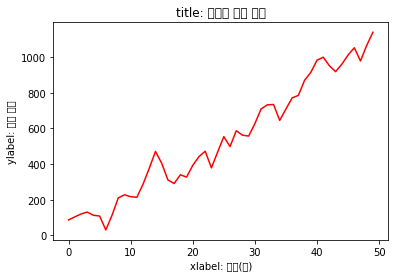

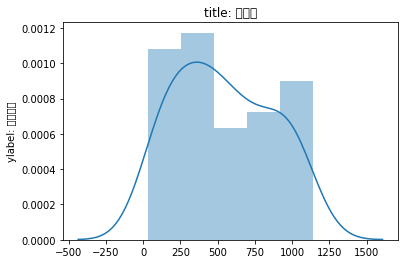

In [4]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
#mpl.rcParams['axes.unicode_minus'] = False

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

data = np.random.randint(-100, 100,50).cumsum()
plt.figure()
plt.plot(range(50), data, 'red')
# plt.plot(data) 와 같음 
plt.title('title: 시간별 가격 추이')
plt.ylabel('ylabel: 주식 가격')
plt.xlabel('xlabel: 시간(분)')
plt.show()

import seaborn as sns
plt.figure()
ax = sns.distplot(data)# 의미없는 그림입니다.
ax.set_title("title: 타이틀")
ax.set_ylabel('ylabel: 와이라벨')
plt.show()

## 어떻게 font를 변경할 수 있나요? 

- 참고한 자료에서는 총 세 가지 방법이 있다고 말하고 있습니다. 

1) matplotlib의 개별 요소들을 생성할 때, fontproperties를 함께 넘겨주는 경우 
    - color, size 등을 argument로 넘기는 경우와 같다고 생각하시면 될것 같아요. 
    - 이 경우에는 font_file_path가 필요해요. 
2) 현재 jupyter notebook에 적용되는 font의 default setting을 바꾸는 경우 
    - 매번 개별 요소에 대해서 fontproperties를 세부적으로 바꾸어줄 필요가 없는 경우, default setting만 바꾸어도 문제가 없습니다. 
    - 단 이경우에 jupyter notebook을 다시 시작하면 바뀐 사항이 적용되지 않습니다.
3) 다음 jupyter notebook에서도 바뀐 font를 적용하는 경우 
    - jupyter notebook을 껐다가 다시 켜도 바뀐 font가 그대로 적용됩니다. 

- 여기서는 3의 방식에 대해서는 알아보지 않고, 1, 2에 대해서만 알아봅니다. 
    - 해당 링크에 들어가시면 마지막 부분에 3)의 방식에 대해서 알 수 있습니다. 
    - https://programmers.co.kr/learn/courses/21/lessons/950

### 1) matplotlib의 개별 요소들별로 font 설정

- font file의 경로를 모두 가져온 다음, 필요로 하는 font의 file 이름을 찾습니다. 
- 저의 경우는 보통 다음 네 가지 정도의 폰트를 주로 쓰는데, 다음 네 이름이 들어간 font를 찾아서 그 경로를 저장해둡니다. 
    - 'BMDOHYEON_otf.otf', 'BMHANNA_11yrs_otf.otf', 'BMJUA_otf.otf', 'SDMiSaeng.ttf',
- 이렇게 하고 나면, `fav_font_file_path`에 제가 원하는 font의 파일 경로가 포함되어 있습니다. 

In [7]:
import matplotlib.font_manager as fm
font_file_path_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
print(len(font_file_path_list))
#print(font_file_path_list[:5]) #복잡하고 길게 나오는 군요 

fav_font_file_path_lst = filter(lambda x: True if "BM" in x or "SDM" in x else False
                                , font_file_path_list)
print()
for font_file_path in fav_font_file_path_lst:
    print(font_file_path)

273

/Users/frhyme/Library/Fonts/SDMiSaeng.ttf
/Users/frhyme/Library/Fonts/BMDOHYEON_otf.otf
/Users/frhyme/Library/Fonts/BMHANNA_11yrs_otf.otf
/Users/frhyme/Library/Fonts/BMJUA_otf.otf


- 아래처럼 fm(matplotllib.font_manager) 하위의 `FontProperties`라는 객체에 `fname`(폰트 파일 경로)와 `size`를 argument로 넘겨주고 생성합니다. 
    - 필요에 따라서 여러개를 만들 수도 있습니다. 

In [8]:
BMDOHYEON = fm.FontProperties(fname='/Users/frhyme/Library/Fonts/BMDOHYEON_otf.otf')
BMJUA = fm.FontProperties(fname='/Users/frhyme/Library/Fonts/BMJUA_otf.otf')
BMHANNA = fm.FontProperties(fname='/Users/frhyme/Library/Fonts/BMHANNA_11yrs_otf.otf')
SDMiSaeng = fm.FontProperties(fname='/Users/frhyme/Library/Fonts/SDMiSaeng.ttf')
nanum = fm.FontProperties(fname='/Library/Fonts/NanumSquareOTFB.otf')
TimesNewRoman = fm.FontProperties(fname='/Library/Fonts/Times New Roman.ttf')

- 자 이제 그림을 그려보면 바뀐 폰트가 적용되어 나오는 것을 알 수 있습니다. 
- 한 번에 한 font만 적용할 수 있는 것이 아니고, 여러 개체의 font를 한번에 바꿀 수도 있습니다. 
    - 또한, 이미 알고 계시겠지만, font 외의 특성(size, color는 개체 argument로 넘겨주어 바꿉니다)

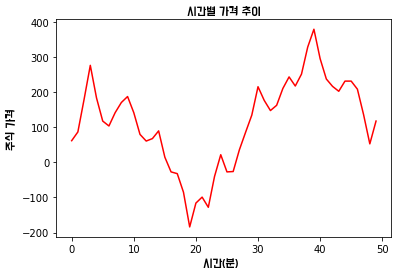

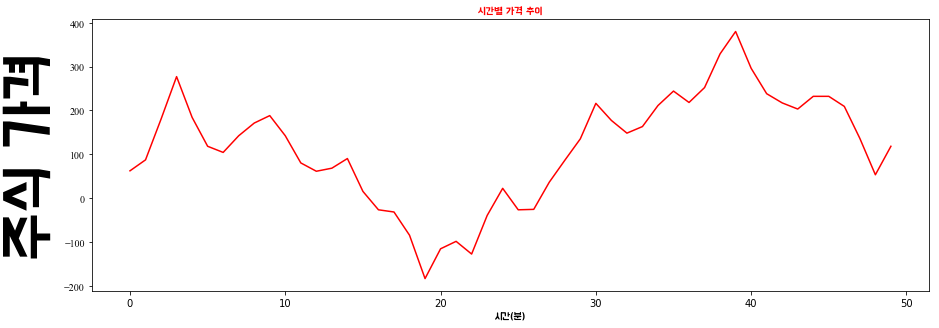

In [10]:
data = np.random.randint(-100, 100,50).cumsum()
plt.figure()
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties = BMDOHYEON)
plt.ylabel('주식 가격', fontproperties = BMDOHYEON)
plt.xlabel('시간(분)  ', fontproperties = BMDOHYEON)
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(range(50), data, 'r')
plt.title('시간별 가격 추이', fontproperties=BMHANNA, color='red')
plt.ylabel('주식 가격', fontproperties=BMDOHYEON, size=50)
plt.xlabel('시간(분)', fontproperties=BMJUA)
plt.yticks(fontproperties = TimesNewRoman)
plt.show()

### 2) font - default setting을 변경

- 1)의 방식에서는 개별 그래프에 대해서 적용했기 때문에 fontproperties를 적용하지 않을 경우, 여전히 한글 font가 깨지는 것을 알 수 있습니다. 
- 그래서 이번에는 기본 세팅 자체를 바꾸는 방식을 알아봅니다. 
    - 하지만 이 경우에도, 해당 jupyter notebook을 껐다가 키면 예전 세팅으로 돌아갑니다. 

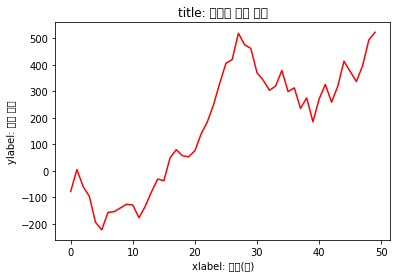

In [12]:
# 앞에서는 해당 그래프에 대해서만 적용했기 때문에, 다른 그래프를 그려보면 똑같이, 한글이 깨지는 것을 알 수 있음. 
data = np.random.randint(-100, 100,50).cumsum()
plt.plot(range(50), data, 'red')
# plt.plot(data) 와 같음 
plt.title('title: 시간별 가격 추이')
plt.ylabel('ylabel: 주식 가격')
plt.xlabel('xlabel: 시간(분)')
plt.show()

- 아래를 보시면 뭐가 굉장히 많고 복잡한데, 귀찮은데, 다 무시하시고, `font.family`에 ['sans-serif']가 적용되어 있는 것만 보시면 됩니다. 

In [13]:
# 우선 현재 어떤 적용값 중에서 font와 관련된 모든 값을 한번 확인해 봅니다. 
for key in plt.rcParamsDefault.keys():
    if 'font' in key:
        print("{}: {}".format(key, plt.rcParamsDefault[key]))

font.cursive: ['Apple Chancery', 'Textile', 'Zapf Chancery', 'Sand', 'Script MT', 'Felipa', 'cursive']
font.family: ['sans-serif']
font.fantasy: ['Comic Sans MS', 'Chicago', 'Charcoal', 'ImpactWestern', 'Humor Sans', 'xkcd', 'fantasy']
font.monospace: ['DejaVu Sans Mono', 'Bitstream Vera Sans Mono', 'Computer Modern Typewriter', 'Andale Mono', 'Nimbus Mono L', 'Courier New', 'Courier', 'Fixed', 'Terminal', 'monospace']
font.sans-serif: ['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
font.serif: ['DejaVu Serif', 'Bitstream Vera Serif', 'Computer Modern Roman', 'New Century Schoolbook', 'Century Schoolbook L', 'Utopia', 'ITC Bookman', 'Bookman', 'Nimbus Roman No9 L', 'Times New Roman', 'Times', 'Palatino', 'Charter', 'serif']
font.size: 10.0
font.stretch: normal
font.style: normal
font.variant: normal
font.weight: normal
legend.fontsize: medium
mathtext.fontset: dejavusa

- plt.rcParams의 font.familty 값을 바꾸어주면 됩니다. 
    - 이 때, font_file_name이나, font_file_path가 아니고, font_name이 들어가야 함을 주의합니다. 
    - font_file_name은 아래 방식을 통해서 얻을 수 있습니다. 
- 또한 같은 방식으로 다른 초기값들도 다르게 세팅할 수 있습니다. 

In [16]:
font_path = '/Users/frhyme/Library/Fonts/BMJUA_otf.otf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name
plt.rcParams['font.size'] = 20

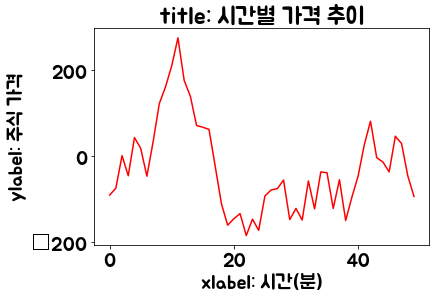

In [17]:
# 이제 잘됨
data = np.random.randint(-100, 100,50).cumsum()
plt.figure()
plt.plot(range(50), data, 'red')
# plt.plot(data) 와 같음 
plt.title('title: 시간별 가격 추이')
plt.ylabel('ylabel: 주식 가격')
plt.xlabel('xlabel: 시간(분)')
plt.show()

- 그런데 보면 minus sign이 깨지는 것을 알 수 있습니다. 
    - 아래처럼 세팅을 바꿔주면 해결됩니다. 

In [21]:
plt.rcParams['axes.unicode_minus'] = False

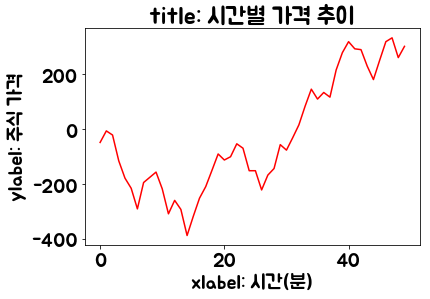

In [22]:
data = np.random.randint(-100, 100,50).cumsum()
plt.figure()
plt.plot(range(50), data, 'red')
# plt.plot(data) 와 같음 
plt.title('title: 시간별 가격 추이')
plt.ylabel('ylabel: 주식 가격')
plt.xlabel('xlabel: 시간(분)')
plt.show()

- 처음에는 rcParams를 변경해주면 minus sign이 제대로 되는 것을 모르고, 아래처럼 다른 방식으로 해결했습니다. 
    - ytick의 값을 읽고 스트링으로 변환해서 다시 적용해줍니다. 

(array([-400., -300., -200., -100.,    0.,  100.,  200.]), <a list of 7 Text yticklabel objects>)


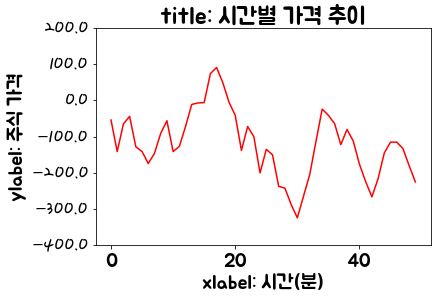

In [24]:
data = np.random.randint(-100, 100,50).cumsum()
plt.figure()
plt.plot(range(50), data, 'red')# range(50)을 넣지 않아도 상관은 없음 
# plt.plot(data) 와 같음 
plt.title('title: 시간별 가격 추이')
plt.ylabel('ylabel: 주식 가격')
plt.xlabel('xlabel: 시간(분)')
plt.yticks(fontproperties = SDMiSaeng, size=25)
ytick = plt.yticks()

print(ytick)
# ytick을 직접 변환해주었다. 
plt.yticks(ytick[0], list(map(lambda x: str(x), ytick[0])))

plt.show()

## 마무리

- 한글 폰트를 적용할 수 있게 되었다. 
- 그외에 plt.rcParams의 값을 변형하여, 그림을 편하게 그릴 수 있게 되지 않을까